# Grid search for finding optimal parameters for DNN Kera Classifier.

In [12]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split,GridSearchCV

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (13.0, 6.0)

In [13]:
pip install scikeras

In [14]:
# Load Cleaned_Complete.csv here
import scikeras
df = pd.read_csv('final_dataset_all_addresses_gen.csv',index_col=False)
df_td=pd.read_csv('Cleaned_Complete_target.csv',index_col=False)

In [15]:
df.head()

,Unnamed: 0,Address,Sent_tnx,Received_tnx,Total_Ether_Balance,Max_Value_Received,Min_Value_Received,Total_Ether_Received,Time_Diff_between_first_and_last_(Mins),Total_Transactions(Including_Tnx_to_Create_Contract),...,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Total_ERC20_Tnxs,ERC20_Avg_Time_Between_Sent_Tnx,ERC20_Avg_Time_Between_Rec_Tnx,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,ERC20_Uniq_Sent_Addr,ERC20_Uniq_Rec_Addr,FLAG
0,0,0xea584e66cc9bde0b9bbdec65f560cbc87ad975cc,1,1,0.000322,0.001699,0.001699,0.001699,0.400000,2,...,2.795265e+07,2.795265e+07,7,27952651.18,4.147640e+03,1,1,1,2,1
1,1,0x1d6065940bfd6ac7c4ec1e2a35e1420e0a9c1bff,3,6,0.000000,2.191435,0.176378,4.741118,9493.816667,9,...,4.083875e+03,1.364227e+03,2,0.00,1.923977e+06,6,3,0,2,1
2,2,0x9d3b55a06c235f22e6102326d6bbdec0f6d9c4ef,1,1,0.000404,0.002969,0.002969,0.002969,0.400000,2,...,2.795281e+07,2.795281e+07,6,75.40,7.540000e+01,1,1,2,1,1
3,3,0xd055610c2d5151adb3eaf994e08abe45dee936e0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,...,0.000000e+00,0.000000e+00,1,0.00,2.579952e+07,0,0,0,1,1
4,4,0xab5fb3af6c7c98bcafcd3c58b706afe988a6103f,16,9,0.000387,1.990000,0.010578,7.000763,47728.266670,25,...,3.073456e+03,1.040117e+03,1,0.00,2.772698e+07,9,10,0,1,1


In [16]:
df_td.head()

,Unnamed: 0,Unnamed:0,FLAG,Avgminbetweensenttnx,Avgminbetweenreceivedtnx,TimeDiffbetweenfirstandlast(Mins),Senttnx,ReceivedTnx,NumberofCreatedContracts,UniqueReceivedFromAddresses,...,ERC20uniqrecaddr,ERC20uniqsentaddr.1,ERC20uniqreccontractaddr,ERC20minvalrec,ERC20maxvalrec,ERC20minvalsent,ERC20maxvalsent,ERC20avgvalsent,ERC20uniqsenttokenname,ERC20uniqrectokenname
0,0,0,0,844.26,1093.71,704785.63,721,89,0,40,...,54.0,0.0,58.0,0.0,1.500000e+07,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,1,1,0,12709.07,2958.44,1218216.73,94,8,0,5,...,5.0,0.0,7.0,0.0,3.650000e+02,2.260809,2.260809e+00,2.260809,1.0,7.0
2,2,2,0,246194.54,2434.02,516729.30,2,10,0,10,...,7.0,0.0,8.0,0.0,4.428198e+02,0.000000,0.000000e+00,0.000000,0.0,8.0
3,3,3,0,10219.60,15785.09,397555.90,25,9,0,7,...,11.0,0.0,11.0,0.0,1.141223e+04,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,4,4,0,36.61,10707.77,382472.42,4598,20,1,7,...,23.0,0.0,27.0,0.0,9.000000e+04,0.000000,4.500000e+04,13726.659220,6.0,27.0


In [17]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('_', ' ')
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
columns = ['senttnx', 'receivedtnx',
       'totaletherbalance', 'maxvaluereceived', 'minvaluereceived',
       'totaletherreceived', 'timediffbetweenfirstandlastmins',
       'totaltransactionsincludingtnxtocreatecontract',
       'avgvalreceived', 'maxvalsent',
       'totalethersent', 'avgvalsent', 'avgminbetweensenttnx',
       'avgminbetweenreceivedtnx', 'totalerc20tnxs',
       'uniquereceivedfromaddresses', 'uniquesenttoaddresses',
       'erc20uniqsentaddr', 'erc20uniqrecaddr', 'flag']
df1 = df[df.columns.intersection(columns)]

<ipython-input-17-ceebb317d2ab>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '')
<ipython-input-17-ceebb317d2ab>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '')


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26118 entries, 0 to 26117
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   senttnx                                        26118 non-null  int64  
 1   receivedtnx                                    26118 non-null  int64  
 2   totaletherbalance                              26118 non-null  float64
 3   maxvaluereceived                               26118 non-null  float64
 4   minvaluereceived                               26118 non-null  float64
 5   totaletherreceived                             26118 non-null  float64
 6   timediffbetweenfirstandlastmins                26118 non-null  float64
 7   totaltransactionsincludingtnxtocreatecontract  26118 non-null  int64  
 8   avgvalreceived                                 26118 non-null  float64
 9   maxvalsent                                     261

In [19]:
# Test Train Split
y = df1['flag']
X = df1.drop(labels='flag',axis=1)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train_full.shape)
X_train_full.head()

#Target dataset
Y_target=df_td['FLAG']
X_target=df_td.drop(columns=['Unnamed: 0','Unnamed:0', 'FLAG'])

(18282, 19)


In [21]:
X

,senttnx,receivedtnx,totaletherbalance,maxvaluereceived,minvaluereceived,totaletherreceived,timediffbetweenfirstandlastmins,totaltransactionsincludingtnxtocreatecontract,avgvalreceived,maxvalsent,totalethersent,avgvalsent,avgminbetweensenttnx,avgminbetweenreceivedtnx,totalerc20tnxs,uniquereceivedfromaddresses,uniquesenttoaddresses,erc20uniqsentaddr,erc20uniqrecaddr
0,1,1,0.000322,0.001699,0.001699,0.001699,0.400000,2,0.001699,0.000000,0.000000,0.000000,2.795265e+07,2.795265e+07,7,1,1,1,2
1,3,6,0.000000,2.191435,0.176378,4.741118,9493.816667,9,0.790186,4.111061,4.738535,1.579512,4.083875e+03,1.364227e+03,2,6,3,0,2
2,1,1,0.000404,0.002969,0.002969,0.002969,0.400000,2,0.002969,0.000000,0.000000,0.000000,2.795281e+07,2.795281e+07,6,1,1,2,1
3,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1,0,0,0,1
4,16,9,0.000387,1.990000,0.010578,7.000763,47728.266670,25,0.777863,1.000000,6.997186,0.437324,3.073456e+03,1.040117e+03,1,9,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26113,0,24,0.000000,43.113878,0.000000,261.369727,12464.400000,25,10.890405,0.000000,0.000000,0.000000,0.000000e+00,5.388348e+02,187,1,0,11,12
26114,0,107,0.000000,0.000000,0.000000,0.000000,63.400000,107,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.981132e-01,0,103,0,0,0
26115,685,7,1.035365,5.000000,0.000000,12.200839,116089.000000,691,1.742977,5.000000,116.664361,0.170313,1.696775e+02,1.548223e+04,517,5,276,171,295
26116,1,1,0.008753,0.011636,0.011636,0.011636,2.000000,2,0.011636,0.000000,0.000000,0.000000,2.821665e+07,2.821665e+07,0,1,1,0,0


In [22]:
# Feature Engineering
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()


# Log for Skewed Data
# log on both train and test data
for c in X.columns:
  X_train_full[c] = X_train_full[c].apply(lambda x: np.log(x) if x > 0 else 0)
  X_test[c] = X_test[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)


In [23]:
# Make scorer
from keras.metrics import Recall, RecallAtPrecision
# metrics to evaluate is the highest recall we can get for a precision above 0.75
RecallAtPrecision_scorer = RecallAtPrecision(precision=0.75)

In [24]:
from tensorflow.keras.constraints import MaxNorm

# Define functions to create the model
def compile_dnnk(input_dim, H, num_epochs, num_layers, activation, dropout_probability):

  # Creating Sequential DNN
  model_n = Sequential()

  model_n.add(layers.Dense(H, input_shape=(input_dim, ), activation= activation))

  for i in range(num_layers - 1):
      model_n.add(layers.Dense(H, activation= activation, kernel_constraint=MaxNorm(3)))
      model_n.add(layers.Dropout(dropout_probability))

  model_n.add(layers.Dense(1, activation='sigmoid'))

  # configure the model
  # use F1 score beause it balances between preciison and recall
  model_n.compile(loss='binary_crossentropy', optimizer='adam', metrics=[RecallAtPrecision_scorer])
  # model_n.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Recall])
  return model_n

In [25]:
#Initialization of parameters for feature Importance.

from scikeras.wrappers import KerasClassifier

# number of hidden nodes
H = 60

# num of epochs
num_epochs = 500

# num_layers
num_layers = 3

# activation function
activation_function = 'relu'

#dropout probability (Used to avoid overfitting)
dropout_probability = 0.5

# input dim
input_dim = X_train_full.shape[1]

model = KerasClassifier(model=compile_dnnk, input_dim=input_dim, H=H, num_epochs=num_epochs, num_layers=num_layers, activation=activation_function, dropout_probability=dropout_probability)

In [28]:
# Grid parameters definition.
param_grid = {'activation':('relu', 'tanh', 'sigmoid'),
              'H': [64,128],
              'num_epochs': [250,500],
             'num_layers': [3,5,7,9,12],
              'dropout_probability': [0.2, 0.3]}
#param_grid = {'H': [40,60,80,120, 128],
#               'num_layers': [1,3,7]}

# param_grid = dict(H=[5,10], num_layers=[3,4])
seed = 42
tf.random.set_seed(42)

In [29]:
# Grid Search
grid = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=2, scoring= 'f1')
grid.fit(X_train_full, y_train_full)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
115/115 [==============================] - 0s 2ms/step
[CV] END H=64, activation=relu, dropout_probability=0.2, num_epochs=250, num_layers=3; total time=   5.8s
115/115 [==============================] - 0s 1ms/step
[CV] END H=64, activation=relu, dropout_probability=0.2, num_epochs=250, num_layers=3; total time=   3.3s
115/115 [==============================] - 0s 1ms/step
[CV] END H=64, activation=relu, dropout_probability=0.2, num_epochs=250, num_layers=3; total time=   6.1s
115/115 [==============================] - 0s 1ms/step
[CV] END H=64, activation=relu, dropout_probability=0.2, num_epochs=250, num_layers=3; total time=   4.4s
115/115 [==============================] - 0s 1ms/step
[CV] END H=64, activation=relu, dropout_probability=0.2, num_epochs=250, num_layers=3; total time=   4.3s
115/115 [==============================] - 0s 1ms/step
[CV] END H=64, activation=relu, dropout_probability=0.2, num_epochs=250, num_

GridSearchCV(cv=5,
             estimator=KerasClassifier(H=60, activation='relu', dropout_probability=0.5, input_dim=19, model=<function compile_dnnk at 0x7e24ee993640>, num_epochs=500, num_layers=3),
             param_grid={'H': [64, 128],
                         'activation': ('relu', 'tanh', 'sigmoid'),
                         'dropout_probability': [0.2, 0.3],
                         'num_epochs': [250, 500],
                         'num_layers': [3, 5, 7, 9, 12]},
             scoring='f1', verbose=2)

In [30]:
grid.best_params_

{'H': 128,
 'activation': 'relu',
 'dropout_probability': 0.2,
 'num_epochs': 500,
 'num_layers': 3}

In [31]:
grid.best_score_

0.8021711468723961

In [32]:
best_dnnk = grid.best_estimator_
best_dnnk

KerasClassifier(
	model=<function compile_dnnk at 0x7e24ee993640>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	input_dim=19
	H=128
	num_epochs=500
	num_layers=3
	activation=relu
	dropout_probability=0.2
	class_weight=None
)

In [33]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_H,param_activation,param_dropout_probability,param_num_epochs,param_num_layers,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.399973,1.035192,0.394844,0.043051,64,relu,0.2,250,3,"{'H': 64, 'activation': 'relu', 'dropout_proba...",0.810618,0.798303,0.747504,0.768855,0.816073,0.788271,0.026123,17
1,4.232691,0.251752,0.485202,0.173200,64,relu,0.2,250,5,"{'H': 64, 'activation': 'relu', 'dropout_proba...",0.802609,0.812261,0.774638,0.777274,0.805630,0.794482,0.015468,9
2,6.321633,1.138709,0.443650,0.042746,64,relu,0.2,250,7,"{'H': 64, 'activation': 'relu', 'dropout_proba...",0.814840,0.792363,0.746159,0.766560,0.792855,0.782555,0.023770,27
3,6.845648,1.396826,0.541210,0.148555,64,relu,0.2,250,9,"{'H': 64, 'activation': 'relu', 'dropout_proba...",0.808769,0.762482,0.597877,0.787589,0.820297,0.755403,0.081191,72
4,8.115693,0.941097,0.725467,0.448146,64,relu,0.2,250,12,"{'H': 64, 'activation': 'relu', 'dropout_proba...",0.777816,0.803631,0.761536,0.790090,0.791487,0.784912,0.014264,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5.022873,1.323914,0.434293,0.019751,128,sigmoid,0.3,500,3,"{'H': 128, 'activation': 'sigmoid', 'dropout_p...",0.719745,0.718447,0.677841,0.692810,0.704510,0.702671,0.015859,91
116,6.452316,0.933900,0.524537,0.139925,128,sigmoid,0.3,500,5,"{'H': 128, 'activation': 'sigmoid', 'dropout_p...",0.731131,0.733075,0.689202,0.685601,0.673705,0.702543,0.024682,92
117,7.708375,1.661683,0.564290,0.117114,128,sigmoid,0.3,500,7,"{'H': 128, 'activation': 'sigmoid', 'dropout_p...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100
118,8.046896,0.647410,0.656889,0.159166,128,sigmoid,0.3,500,9,"{'H': 128, 'activation': 'sigmoid', 'dropout_p...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100


In [ ]:
#results.to_csv('mlp-grid.csv')

In [34]:
best_dnnk.score(X_train_full, y_train_full)

572/572 [==============================] - 1s 1ms/step


0.8174160376326441

In [35]:
best_dnnk.score(X_test, y_test)

245/245 [==============================] - 0s 1ms/step


0.8145737621235324

In [36]:
model_tuned = compile_dnnk(X_train_full.shape[1], 128, 500, 3, 'relu', 0.2)
model_tuned.fit(X_train_full, y_train_full)

572/572 [==============================] - 3s 3ms/step - loss: 0.4309 - recall_at_precision: 0.4592


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
predicted_y = model_tuned.predict(X_test)
predicted_y = (predicted_y > 0.5).astype('int32')
accuracy_score(y_test,predicted_y)
print(classification_report(y_test,predicted_y))


245/245 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4422
           1       0.87      0.75      0.80      3414

    accuracy                           0.84      7836
   macro avg       0.85      0.83      0.84      7836
weighted avg       0.85      0.84      0.84      7836



In [38]:
pred_y=model_tuned.predict(X_target)
pred_y=(pred_y>0.5).astype('int32')
print(accuracy_score(Y_target,pred_y))
print(classification_report(Y_target,pred_y))
cm = confusion_matrix(Y_target,pred_y)
cm_display = ConfusionMatrixDisplay(cm).plot()

ValueError: ignored

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()
explainer = shap.Explainer(model_tuned, X_train_full, feature_names=X.columns)
shap_values500 = explainer(X_train_full[:500])

Permutation explainer: 501it [01:29,  5.12it/s]


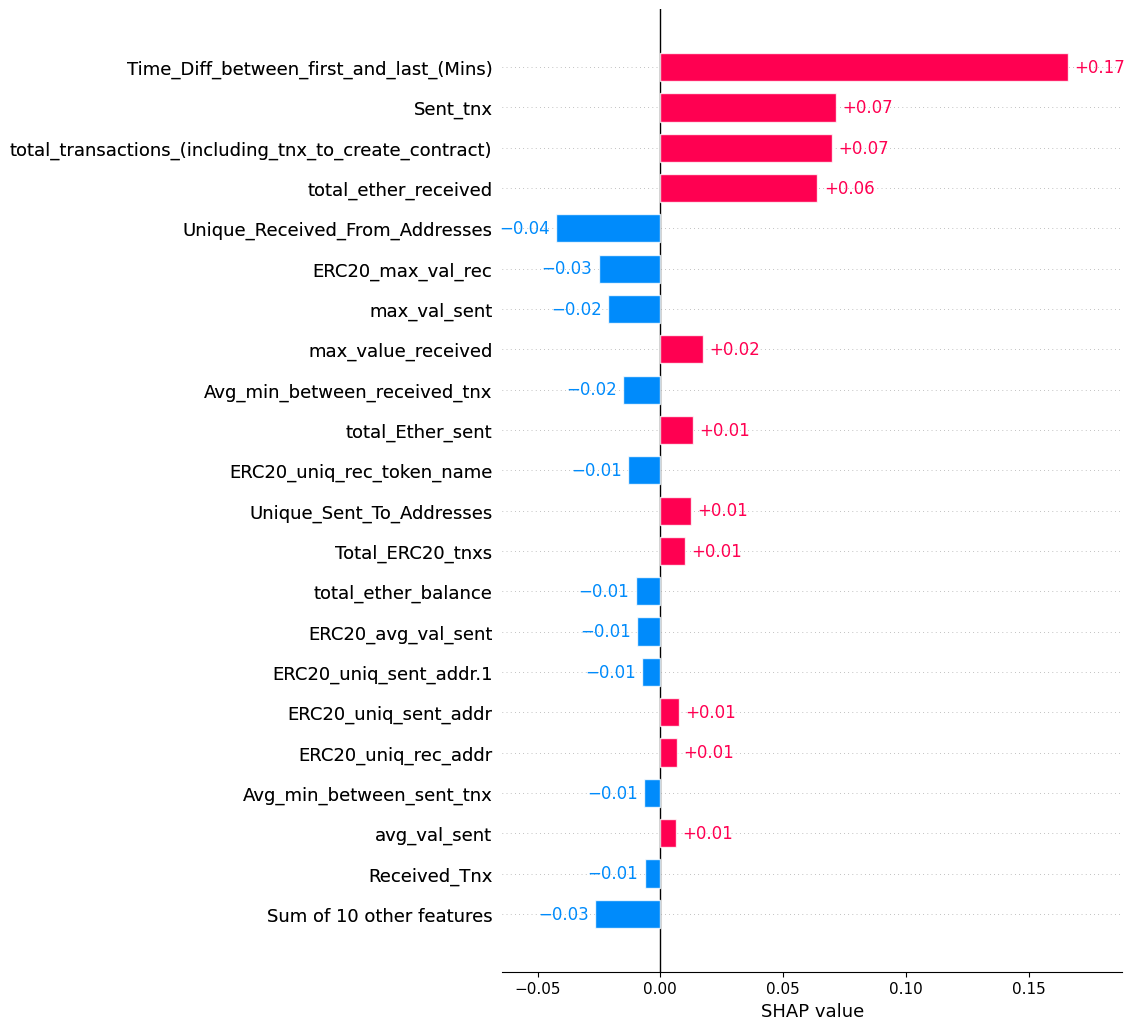

In [ ]:
f = shap.plots.bar(shap_values500[0], max_display=22)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


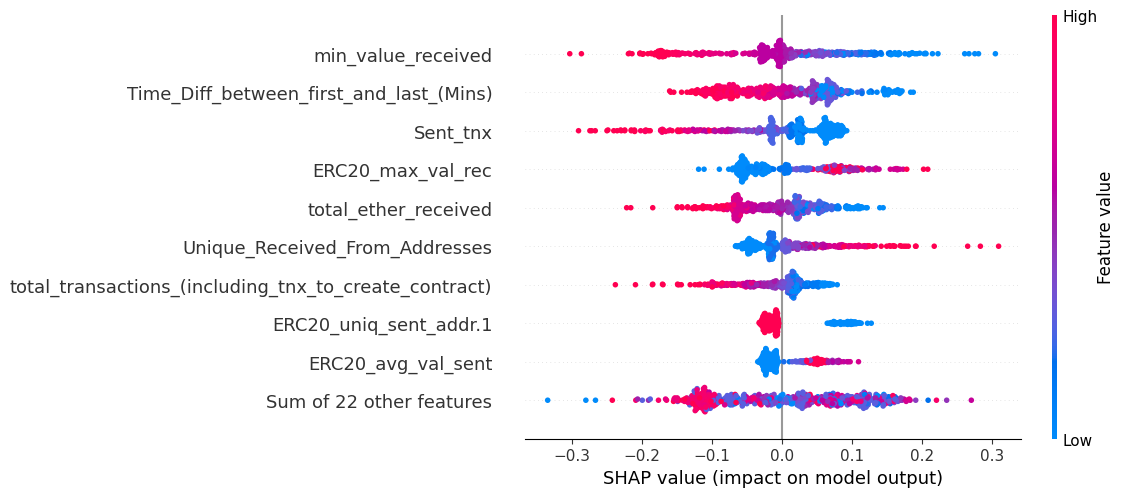

In [ ]:
f = shap.plots.beeswarm(shap_values500,show=False)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


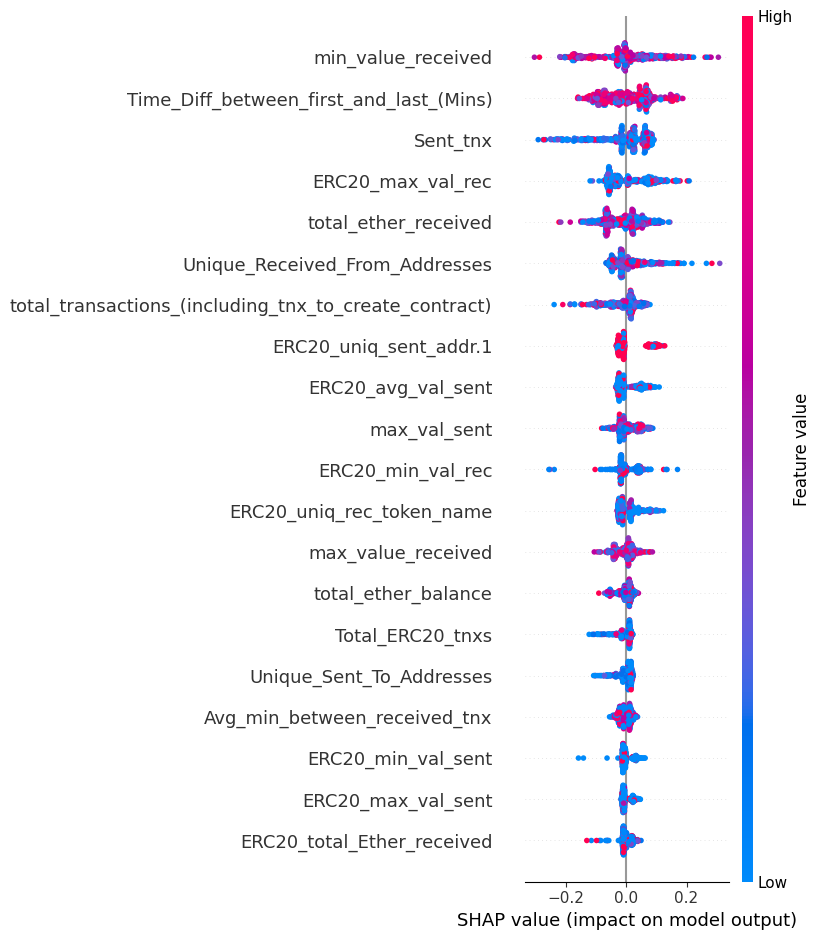

In [ ]:
shap.summary_plot(shap_values500,X_test[:500],feature_names=X.columns)

Permutation explainer: 1406it [03:34,  6.36it/s]


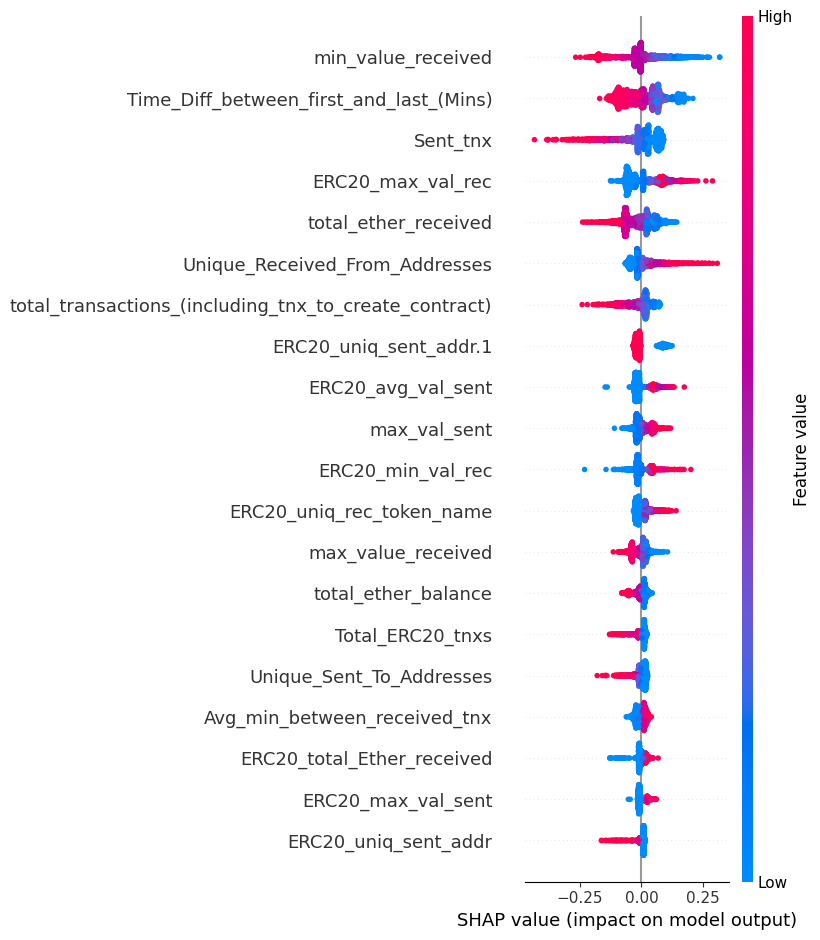

In [ ]:
shap_values_test_full = explainer(X_test)
shap.summary_plot(shap_values_test_full,X_test,feature_names=X.columns)